1. Implement the intensity transformation depicted in Fig. 1a on the image shown in Fig. 1b.
In OpenCV, intensity transformation means applying a function s=T(r) to each pixel value of an image.
You can do this in a few ways depending on the transformation type:

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# Read gray scale image
img = cv2.imread(r'D:\5th sem\Image proccessing\EN3160-Assignment-1---Intensity-Transformations-and-Neighborhood-Filtering\a1images\emma.jpg', 0)

# Prepare output
output = np.zeros_like(img, dtype=np.float32)

In [ ]:
# for section one - linear transformation with unit gradient
section1 = img < 50
output[section1] = img[section1]

In [7]:
section2= (img >= 50) & (img < 150)
output[section2]= (15.5 * img[section2]) + 50

In [10]:
# for section three - linear transformation with unit gradient
section3 = (img >= 150) & (img < 255)
output[section3]= img[section3]


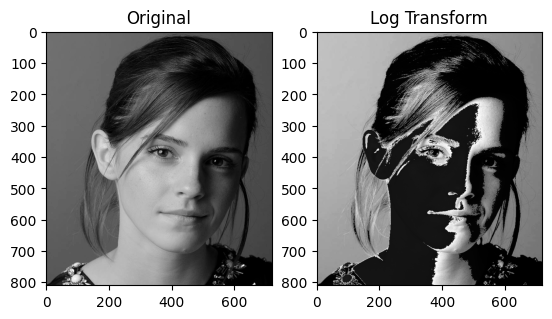

In [ ]:
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(output, cmap='gray'), plt.title('Log Transform')
plt.show()

 2. Apply a similar operation as above (question 1) to accentuate
 (a) white matter
 (b) gray matter

White Matter (WM) appears brighter in T1-weighted MRI (high intensity values).
Gray Matter (GM) appears darker than WM but brighter than CSF (medium intensity values).

We can threshold or remap these intensity ranges to make them stand out.

Binary masks (same size as the image) where:
- 255 = keep this pixel (belongs to WM or GM)
- 0 = discard this pixel (doesn’t belong to that tissue)

In [ ]:
# Read MRI in grayscale
img2 = cv2.imread(r'D:\5th sem\Image proccessing\EN3160-Assignment-1---Intensity-Transformations-and-Neighborhood-Filtering\a1images\brain_proton_density_slice.png', 0)

# Normalize image for consistent scaling to the range 0-255
img_norm = cv2.normalize(img2, None, 0, 255, cv2.NORM_MINMAX)

# White Matter mask (bright intensities, e.g., 180–255)
wm_mask = cv2.inRange(img_norm, 180, 255)

# Gray Matter mask (medium intensities, e.g., 100–179)
gm_mask = cv2.inRange(img_norm, 100, 179)

## The mask determines which output pixels are calculated and which are set to zero.
Only pixels where mask = 255 are taken from (img_norm & img_norm).
All other positions become black (intensity 0).

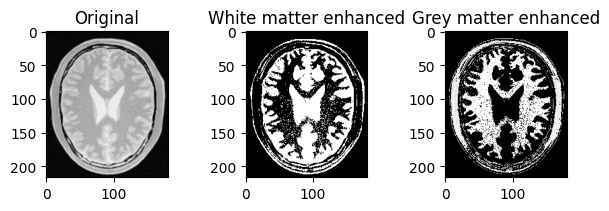

In [ ]:
# Apply masks (accentuate by making them brighter)
wm_highlight = cv2.bitwise_and(img_norm, img_norm, mask=wm_mask)
gm_highlight = cv2.bitwise_and(img_norm, img_norm, mask=gm_mask)

# Optionally enhance contrast
wm_highlight = cv2.convertScaleAbs(wm_highlight, alpha=1.5, beta=0)
gm_highlight = cv2.convertScaleAbs(gm_highlight, alpha=1.5, beta=0)

# Show results
import matplotlib.pyplot as plt

# plotting results

plt.subplot(1, 3, 1)
plt.imshow(img2, cmap='gray')
plt.title('Original')

plt.subplot(1, 3, 2)
plt.imshow(wm_highlight, cmap='gray')
plt.title('White matter enhanced')

plt.subplot(1, 3, 3)
plt.imshow(gm_highlight, cmap='gray')
plt.title('Grey matter enhanced')

plt.tight_layout(pad=3)  # pad controls space between plots
plt.show()
